In [417]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city") \
        .sort_values(by="city") \
        .reset_index(drop=True)

# Display the data table for preview
combined_data.head(10)

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-01-11 02:22:07,29.24,7279902884763,12,Urban
1,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
3,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
4,Amandaburgh,2018-01-21 04:12:54,9.26,5528427024492,12,Urban
5,Amandaburgh,2018-04-19 16:30:12,6.27,4400632718421,12,Urban
6,Amandaburgh,2018-03-20 07:40:33,27.45,3701008274871,12,Urban
7,Amandaburgh,2018-04-01 09:24:21,24.29,1995462170530,12,Urban
8,Amandaburgh,2018-04-20 02:16:07,16.27,3513123734716,12,Urban
9,Amandaburgh,2018-03-13 12:52:31,13.88,6222134922674,12,Urban


## Bubble Plot of Ride Sharing Data

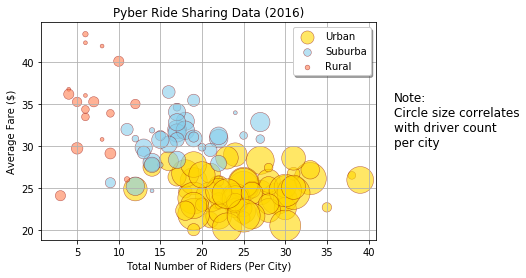

In [418]:
# Obtain the x and y coordinates for each of the three city types:

# to get the list of city types 
city_types_list = []
for c_type in combined_data["type"]:
    if c_type not in city_types_list:
        city_types_list.append(c_type)

colors = itertools.cycle(["gold", "skyblue", "coral"])

for city_type in city_types_list:
    x = pd.DataFrame(combined_data.loc[combined_data["type"] == city_type ], columns=["city", "ride_id"]) \
            .groupby("city")["ride_id"].count()
    y = pd.DataFrame(combined_data.loc[combined_data["type"] == city_type ], columns=["city", "fare"]) \
            .groupby("city")["fare"].mean()
    z = pd.DataFrame(combined_data.loc[combined_data["type"] == city_type ], columns=["city", "driver_count"]) \
            .groupby("city")["driver_count"].mean()
    plt.scatter(x, y, s=z*15, c=next(colors), alpha=0.6, edgecolors="darkred", linewidth=0.5)

### ________________________________________________________________________________________________________###    
#### LONG WAY: START #####

#x_urban = pd.DataFrame(combined_data.loc[combined_data["type"] == "Urban"], columns=["city", "ride_id"]) \
    #.groupby("city")["ride_id"].count()
#x_suburban = pd.DataFrame(combined_data.loc[combined_data["type"] == "Suburban"], columns=["city", "ride_id"]) \
    #.groupby("city")["ride_id"].count()
#x_rural = pd.DataFrame(combined_data.loc[combined_data["type"] == "Rural"], columns=["city", "ride_id"]) \
    #.groupby("city")["ride_id"].count()

#y_urban = pd.DataFrame(combined_data.loc[combined_data["type"] == "Urban"], columns=["city", "fare"]) \
    #.groupby("city")["fare"].mean()
#y_suburban = pd.DataFrame(combined_data.loc[combined_data["type"] == "Suburban"], columns=["city", "fare"]) \
    #.groupby("city")["fare"].mean()
#y_rural = pd.DataFrame(combined_data.loc[combined_data["type"] == "Rural"], columns=["city", "fare"]) \
    #.groupby("city")["fare"].mean()

#z_urban = pd.DataFrame(combined_data.loc[combined_data["type"] == "Urban"], columns=["city", "driver_count"]) \
    #.groupby("city")["driver_count"].mean()
#z_suburban = pd.DataFrame(combined_data.loc[combined_data["type"] == "Suburban"], columns=["city", "driver_count"]) \
    #.groupby("city")["driver_count"].mean()
#z_rural = pd.DataFrame(combined_data.loc[combined_data["type"] == "Rural"], columns=["city", "driver_count"]) \
    #.groupby("city")["driver_count"].mean()

# Build the scatter plots for each city types
#plt.scatter(x_urban, y_urban, s=z_urban*15, c="orange", alpha=0.4, edgecolors="red", linewidth=0.5)
#plt.scatter(x_suburban, y_suburban, s=z_suburban*15, c="blue", alpha=0.4, edgecolors="blue", linewidth=0.5)
#plt.scatter(x_rural, y_rural, s=z_rural*15, c="green", alpha=0.4, edgecolors="green", linewidth=0.5)

### LONG WAY: END ###
### ________________________________________________________________________________________________________###

# Incorporate the other graph properties

plt.grid()

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(["Urban","Suburba","Rural"], shadow=True, fontsize="medium", markerscale=0.55)

# Incorporate a text label regarding circle size
textstr = "Note:\nCircle size correlates\nwith driver count\nper city"
plt.text(43, 30, textstr, fontsize=12)

# Save Figure
plt.savefig("Pyber Ride Sharing Data (2016).png")
plt.show()

In [419]:
# Show plot
plt.show()

## Total Fares by City Type

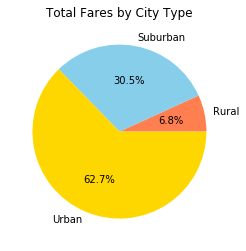

In [420]:
# Calculate Type Percents
total_fares = pd.DataFrame(combined_data, columns=["type", "fare"]).groupby("type").sum()
total = total_fares["fare"].sum()

list_of_fares = []

fares = list(total_fares["fare"])
colors = itertools.cycle(["coral", "skyblue", "gold"])
for fare in fares:
    percentage = round(fare/total * 100, 2)
    list_of_fares.append(percentage)

plt.pie(list_of_fares, labels=list(total_fares.index.values), autopct="%1.1f%%", colors=colors)
plt.title("Total Fares by City Type")

#Save Figure
plt.savefig("Total Fares by City Type.png")
plt.show()


In [421]:
# MORE ADVANCED WAY 
plt.show()

# Total Rides by City Type


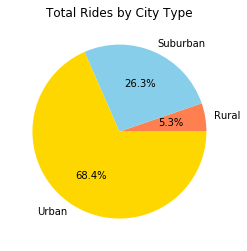

In [422]:
# Calculate Ride Percents
total_rides = pd.DataFrame(combined_data, columns=["type", "ride_id"]).groupby("type").count()
total = total_rides["ride_id"].sum()

list_of_rides = []

rides = list(total_rides["ride_id"])
colors = itertools.cycle(["coral", "skyblue", "gold"])
for ride in rides:
    percentage = round(ride/total * 100, 2)
    list_of_rides.append(percentage)
    
# Build Pie Chart
plt.pie(list_of_rides, labels=list(total_rides.index.values), autopct="%1.1f%%", colors=colors)
plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("Total Rides by City Type.png")
plt.show()

In [423]:
# Show Figure
plt.show()

## Total Drivers by City Type

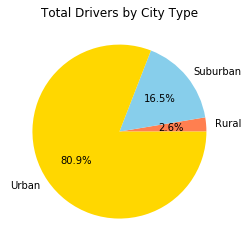

In [424]:
# Calculate Driver Percents
total_drivers_by_city = pd.DataFrame(combined_data, columns=["city","type", "driver_count"]).groupby("city").first()
total_drivers = pd.DataFrame(total_drivers_by_city, columns=["type", "driver_count"]).groupby("type").sum()
total = total_drivers["driver_count"].sum()

list_of_drivers = []

drivers = list(total_drivers["driver_count"])
colors = itertools.cycle(["coral", "skyblue", "gold"])
for driver in drivers:
    percentage = round(driver/total * 100, 2)
    list_of_drivers.append(percentage)

# Build Pie Charts
plt.pie(list_of_drivers, labels=list(total_drivers.index.values), autopct="%1.1f%%", colors=colors)
plt.title("Total Drivers by City Type")

# Save Figure
plt.savefig("Total Drivers by City Type.png")
plt.show()

In [425]:
# Conclusions: 
    # 1. Urban area has the highest number of drivers among all three
    # 2. Urban ares also has the higest number of riders camparing to sub-urban and rural areas
    # 3. The average fare per ride is the highest in Rural area